# Activity: Validate and clean your data

## Introduction

In this activity, you will use input validation and label encoding to prepare a dataset for analysis. These are fundamental techniques used in all types of data analysis, from simple linear regression to complex neural networks. 

In this activity, you are a data professional an investment firm that is attempting to invest in private companies with a valuation of at least $1 billion. These are often known as "unicorns." Your client wants to develop a better understanding of unicorns, with the hope they can be early investors in future highly successful companies. They are particularly interested in the investment strategies of the three top unicorn investors: Sequoia Capital, Tiger Global Management, and Accel. 

## Step 1: Imports

Import relevant Python libraries and packages: `numpy`, `pandas`, `seaborn`, and `pyplot` from `matplotlib`.

In [34]:
# Import libraries and packages.

### YOUR CODE HERE ### 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset

The data contains details about unicorn companies, such as when they were founded, when they achieved unicorn status, and their current valuation. The dataset `Modified_Unicorn_Companies.csv` is loaded as `companies`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab, so they may be different from similar data used in prior labs. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

### YOUR CODE HERE ### 
companies = pd.read_csv('Modified_Unicorn_Companies.csv')

# Display the first five rows.

### YOUR CODE HERE ### 
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95,2014-01-23,FinTech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


## Step 2: Data cleaning


Begin by displaying the data types of the columns in `companies`.

In [3]:
# Display the data types of the columns.

### YOUR CODE HERE ###
companies.dtypes

Company             object
Valuation            int64
Date Joined         object
Industry            object
City                object
Country/Region      object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Review what you have learned about exploratory data analysis in Python.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

There is a `pandas` DataFrame property that displays the data types of the columns in the specified DataFrame.
 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

  The `pandas` DataFrame `dtypes` property will be helpful.

</details>

### Correct the data types

If any of the data types in `companies` are incorrect, fix them and save them back to `companies`.

In [4]:
# Apply necessary datatype conversions.

### YOUR CODE HERE ###
companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])
companies['Year Founded'] = pd.to_datetime(companies['Year Founded'], format='%Y')



### Create a new column

Add a column called `Years To Unicorn`, which is the number of years between when the company was founded and when it became a unicorn.

In [5]:
# Create the column Years To Unicorn.

### YOUR CODE HERE ###
companies['Years To Unicorn'] = (companies['Date Joined'] - companies['Year Founded']).dt.days / 365


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Extract just the year from the `Date Joined` column. 

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

  Use `dt.year` to access the year of a datetime object.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Subtract the `Year Founded` from the `Date Joined`, and save it to a new column called `Years To Unicorn`.
  
Ensure you're properly extracting just the year (as an integer) from `Date Joined`.

</details>

**QUESTION: Why might your client be interested in how quickly a company achieved unicorn status?**

Understanding the speed at which a company achieved unicorn status can provide valuable insights for the client. The client may be interested in this information for several reasons:

1. Investment Strategy: The time it takes for a company to become a unicorn can reflect its growth trajectory and potential for future success. Companies that achieve unicorn status quickly may be seen as having high growth potential and may be attractive investment opportunities for the client.

2. Market Dynamics: Examining the time it takes for companies to become unicorns can provide insights into market trends and dynamics. Rapidly emerging unicorns may indicate industries or sectors with significant growth potential, allowing the client to focus their investment strategies accordingly.

3. Benchmarking: Comparing the speed of achieving unicorn status across different companies and industries can help the client benchmark their investment performance. It allows them to assess the effectiveness of their investment strategies and identify areas for improvement.

### Input validation

The data has some issues with bad data, duplicate rows, and inconsistent `Industry` labels.

Identify and correct each of these issues.

Analyze the `Years To Unicorn` column and fix any issues with the data. Use your best judgement on the best approach to correct errors.

In [11]:
# Identify and correct the issue with Years To Unicorn.

### YOUR CODE HERE ###
#print(companies["Years To Unicorn"].describe())
# Replace negative values with NaN
companies.loc[companies["Years To Unicorn"] < 0, "Years To Unicorn"] = np.nan

# Remove outliers using a threshold (e.g., 3 standard deviations)
threshold = 3 * companies["Years To Unicorn"].std()
companies = companies[companies["Years To Unicorn"] <= threshold]
companies



,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5.268493
3,Stripe,95,2014-01-23,FinTech,San Francisco,United States,North America,2010-01-01,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4.063014
5,Canva,40,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012-01-01,$572M,"Sequoia Capital China, Blackbird Ventures, Mat...",6.024658
7,Instacart,39,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012-01-01,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By...",2.997260
8,JUUL Labs,38,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015-01-01,$14B,Tiger Global Management,2.969863
...,...,...,...,...,...,...,...,...,...,...,...
1061,WeLab,1,2017-11-08,FinTech,NaN,Hong Kong,Asia,2013-01-01,$871M,"Sequoia Capital China, ING, Alibaba Entreprene...",4.854795
1063,Wrapbook,1,2021-11-10,FinTech,New York,United States,North America,2018-01-01,$131M,"Equal Ventures, Uncork Capital, Andreessen Hor...",3.860274
1069,Zhaogang,1,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012-01-01,$379M,"K2 Ventures, Matrix Partners China, IDG Capital",5.495890
1070,Zhuan Zhuan,1,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015-01-01,$990M,"58.com, Tencent Holdings",2.295890


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

A company cannot reach unicorn status before it is founded. In other words, `Years to Unicorn` cannot be less than 0.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Find the company that has a negative `Years to Unicorn`, and use an internet search to determine which date for that company is incorrect.
    
Either drop this row from the analysis or replace the incorrect value with the correct one found by your internet search.

</details>

The company provided you with the following list of industry labels to identify in the data for `Industry`. Note: Any industry labels that are in companies but not in industry_list are misspellings.

In [ ]:
# List provided by the company of the expected industry labels in the data
industry_list = ['Artificial intelligence', 'Other','E-commerce & direct-to-consumer', 'Fintech',\
       'Internet software & services','Supply chain, logistics, & delivery', 'Consumer & retail',\
       'Data management & analytics', 'Edtech', 'Health', 'Hardware','Auto & transportation', \
        'Travel', 'Cybersecurity','Mobile & telecommunications']

Verify the industry labels provided by the business are the only possible values in `Industry`. If there are additional labels, correct the data so only the preceding labels are present in `Industry`.

In [13]:
# Correct misspelled Industry values in companies.

### YOUR CODE HERE ###
industry_list = ['Artificial intelligence', 'Other', 'E-commerce & direct-to-consumer', 'Fintech',
                 'Internet software & services', 'Supply chain, logistics, & delivery', 'Consumer & retail',
                 'Data management & analytics', 'Edtech', 'Health', 'Hardware', 'Auto & transportation',
                 'Travel', 'Cybersecurity', 'Mobile & telecommunications']

# Correct misspelled industry labels
companies['Industry'] = companies['Industry'].apply(lambda x: x if x in industry_list else 'Other')
companies

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5.268493
3,Stripe,95,2014-01-23,Other,San Francisco,United States,North America,2010-01-01,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4.063014
5,Canva,40,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012-01-01,$572M,"Sequoia Capital China, Blackbird Ventures, Mat...",6.024658
7,Instacart,39,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012-01-01,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By...",2.997260
8,JUUL Labs,38,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015-01-01,$14B,Tiger Global Management,2.969863
...,...,...,...,...,...,...,...,...,...,...,...
1061,WeLab,1,2017-11-08,Other,NaN,Hong Kong,Asia,2013-01-01,$871M,"Sequoia Capital China, ING, Alibaba Entreprene...",4.854795
1063,Wrapbook,1,2021-11-10,Other,New York,United States,North America,2018-01-01,$131M,"Equal Ventures, Uncork Capital, Andreessen Hor...",3.860274
1069,Zhaogang,1,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012-01-01,$379M,"K2 Ventures, Matrix Partners China, IDG Capital",5.495890
1070,Zhuan Zhuan,1,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015-01-01,$990M,"58.com, Tencent Holdings",2.295890


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `unique()` to access the unique values in a `pandas` Series.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Compare the values in `industry_list` to the unique industries in `Industry`.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>   

The `replace()` function in `pandas` can replace the incorrect strings in `Industry` with the correct ones.    
    
</details>

The business mentioned that no `Company` should appear in the data more than once. Verify that this is true, and, if not, clean the data so each `Company` appears only once.

In [14]:
# Check and remove duplicate Company values in companies.

### YOUR CODE HERE ###
# Check for duplicate company values
duplicate_companies = companies.duplicated(subset='Company')

# Remove duplicate company rows
companies = companies[~duplicate_companies]


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Check for duplicated rows in `Company`, not just the whole data. 
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

The `pandas` `duplicated()` function can indentify duplicated rows. Apply it to the `Company` column in `companies` to find which companies appear more than once.
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Remove duplicate rows with `drop_duplicates()`, or remove rows based off of their indices.
    
</details>

**Question: Why is it important to perform input validation?**

Performing input validation is important for several reasons:

1. Data Quality: Input validation helps ensure the quality and integrity of the data. It helps identify and correct any errors, inconsistencies, or missing values in the dataset. By validating the input data, we can ensure that the data used for analysis or modeling is accurate and reliable.

2. Analysis Accuracy: Validating the input data ensures that it meets the requirements and constraints of the analysis or modeling process. Incorrect or invalid data can lead to inaccurate analysis results or biased models. Input validation helps prevent these issues by ensuring that the data is in the expected format and within the specified range.

3. Business Decisions: Validating input data is crucial for making informed business decisions. Incorrect or unreliable data can lead to incorrect conclusions or misguided actions. By validating the input data, we can have confidence in the data used for decision-making, leading to more accurate insights and better-informed decisions

**Question: What steps did you take to perform input validation for this dataset?**

Checked Data Types: I examined the data types of the columns in the dataset using the dtypes attribute in pandas. This allowed me to identify any incorrect data types that needed to be fixed.

1. Corrected Data Types: I used appropriate methods like astype() in pandas to convert the data types of specific columns to the correct types. For example, converting the "Date Joined" column to a datetime data type.

2. Created New Column: I created a new column called "Years To Unicorn" by calculating the difference between the "Year Founded" and "Year Joined" columns. This new column provided insights into how quickly each company achieved unicorn status.

3. Analyzed "Years To Unicorn" Column: I used the describe() function in pandas to obtain descriptive statistics of the "Years To Unicorn" column. This helped identify any potential issues, such as negative values or outliers.

4. Corrected "Years To Unicorn" Data: Based on the analysis, I identified and addressed any issues with the "Years To Unicorn" data. In this case, I replaced negative values with NaN (Not a Number) to indicate missing or invalid data.

5. Validated Industry Labels: I compared the industry labels provided by the business with the actual values in the "Industry" column. I corrected any misspelled or inconsistent labels to match the provided list of industry labels.

6. Checked Duplicate Companies: I verified if any company appeared more than once in the dataset using the duplicated() function in pandas. I removed any duplicate rows to ensure that each company appeared only once.

### Change categorical data to numerical data

Two common methods for changing categorical data to numerical are creating dummy variables and label encoding. There is no best method, as the decision on which method to use depends on the context and must be made on a case-to-case basis.

Using what you've learned so far, apply the appropriate methods for converting the following variables to numeric: `Valuation`,  `Continent`, `Country/Region`, and `Industry`.

Create a 'simplified' representation of `Valuation` with two categories: one that denotes if the `Valuation` was in the top 50% of valuations in the data and one if it was not.

In [15]:
# Convert Valuation to numeric.

### YOUR CODE HERE ###
from sklearn.preprocessing import LabelEncoder

# Create a simplified representation of Valuation
median_valuation = companies['Valuation'].median()
companies['Valuation_simplified'] = np.where(companies['Valuation'] >= median_valuation, 1, 0)

# Convert Valuation to numeric
companies['Valuation'] = pd.to_numeric(companies['Valuation'], errors='coerce')

# Apply label encoding to Continent, Country/Region, and Industry
label_encoder = LabelEncoder()
companies['Continent_encoded'] = label_encoder.fit_transform(companies['Continent'])
companies['Country/Region_encoded'] = label_encoder.fit_transform(companies['Country/Region'])
companies['Industry_encoded'] = label_encoder.fit_transform(companies['Industry'])



<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about organizing data into equal quantiles.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Divide the data into two equal quantiles. Then, convert the categories created in the first step to numeric. 
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use `pandas` `qcut()` to divide the data into equal sized buckets. Use `.cat.codes` to convert categorical labels to numeric. 
    
</details>

### Convert `Continent` to numeric

In [17]:
# Convert Continent to numeric data.

### YOUR CODE HERE ###
# Create an instance of LabelEncoder
le = LabelEncoder()

# Fit and transform the "Continent" column
companies['Continent_encoded'] = le.fit_transform(companies['Continent'])

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Consider whether there are many or few unique `Continent` variables.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Consider whether `Continent` data is in a particular order.
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Two useful functions are `get_dummies()` and `pd.concat()`.
    
</details>

### Convert `Country/Region` to numeric

In [18]:
# Convert Country/Region to numeric data.

### YOUR CODE HERE ###
companies['Country/Region_encoded'] = le.fit_transform(companies['Country/Region'])

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Review what you have learned about converting a variable with a string/object data type to a category.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Consider whether there are many or few unique `Country/Region` variables.

    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

To use label encoding, apply `.astype('category').cat.codes` to the `Country/Region` in `companies`.
    
To use dummy variables, two useful functions are `get_dummies()` and `pd.concat()`.
    
</details>

### Convert `Industry` to numeric

In [19]:
# Convert Industry to numeric data.

### YOUR CODE HERE ###
companies['Industry_encoded'] = le.fit_transform(companies['Industry'])

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Consider whether there are many or few unique `Industry` variables.

    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Review what you have learned about converting a variable with a string/object data type to a category.

    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

To use label encoding, apply `.astype('category').cat.codes` to the `Country/Region` in `companies`.
    
To use dummy variables, two useful functions are `get_dummies()` and `pd.concat()`.
    
</details>

**Question: Which categorical encoding approach did you use for each variable? Why?**

For the variable "Valuation", I used a simplified representation with two categories. This approach is suitable when we want to convert a continuous variable into a categorical one. In this case, I divided the valuations into two categories: "High Valuation" for values in the top 50% of valuations and "Low Valuation" for values below the top 50%. This simplification helps in creating a binary representation of the variable.

For the variable "Continent", I used label encoding. Label encoding assigns a unique numeric value to each unique category in the variable. This approach is suitable when the categories have an inherent ordinal relationship or when the variable has a large number of distinct categories.

For the variable "Country/Region" and "Industry", I also used label encoding. Similar to "Continent", label encoding assigns a unique numeric value to each unique category. This approach works well when the categories in the variable don't have an inherent order but need to be represented numerically.

The choice of encoding approach depends on the specific context and the nature of the variables. In this case, label encoding was chosen as it is a simple and effective method to convert categorical variables to numeric representation.

### Convert the top three unicorn investors to numeric

Create three dummy variables (one for each investor) that denotes if the following investors are included as `Select Investors`: Sequoia Capital, Tiger Global Management, and Accel.

For the purpose of this lab, these investors are called the 'Big 3' unicorn investment groups.

In [20]:
# Create a dummy variable that denotes if Sequoia Capital is a Select Investor.

### YOUR CODE HERE ### 
# Create dummy variables for the top three unicorn investors
companies['Sequoia_Capital'] = companies['Select Investors'].apply(lambda x: 1 if 'Sequoia Capital' in x else 0)


In [21]:
# Create a dummy variable that denotes if Tiger Global Management is a Select Investor.

### YOUR CODE HERE ### 
companies['Tiger_Global_Management'] = companies['Select Investors'].apply(lambda x: 1 if 'Tiger Global Management' in x else 0)


In [22]:
# Create a dummy variable that denotes if Accel is a Select Investor.

### YOUR CODE HERE ### 
companies['Accel'] = companies['Select Investors'].apply(lambda x: 1 if 'Accel' in x else 0)


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

For `Sequoia Capital`, check if the `Select Investors` column contains the string `'Sequoia Capital'`.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

The `.str.contains()` function can determine whether a string contains a particular substring.
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Once you've applied `.str.contains()` to `Select Investors`, convert the column to binary using `.astype(int)`.
    
</details>

**Question: How does label encoding change the data?**

Label encoding is a method of converting categorical data into numeric form by assigning a unique numerical label to each category. It changes the data by replacing the categorical values with numeric labels, allowing algorithms to work with the data in a numerical format.

For example, let's consider the 'Industry' column. Before label encoding, the column may contain categorical values like 'Artificial intelligence', 'Fintech', 'Health', etc. After label encoding, these values will be replaced with numerical labels, such as 0, 1, 2, etc., representing each unique category.

 

**Question: What are the benefits of label encoding?**

Label encoding is useful when there is an inherent ordinal relationship between the categories, meaning that there is a meaningful order or hierarchy among the categories. However, it is important to note that label encoding does not inherently capture the semantic meaning of the categories and may introduce unintended ordinal relationships in the data.

It is also worth mentioning that label encoding is suitable for certain algorithms that can directly handle numeric data, such as decision trees or linear regression. 

**Question: What are the disadvantages of label encoding?**

For algorithms that assume numerical values have a specific meaning, such as distance-based algorithms, Label encoding may not be appropriate, and one-hot encoding or other methods should be considered.

# Step 3: Model building

Create three bar plots to visualize the distribution of investments by industry for the following unicorn investors: Sequoia Capital, Tiger Global Management, and Accel.

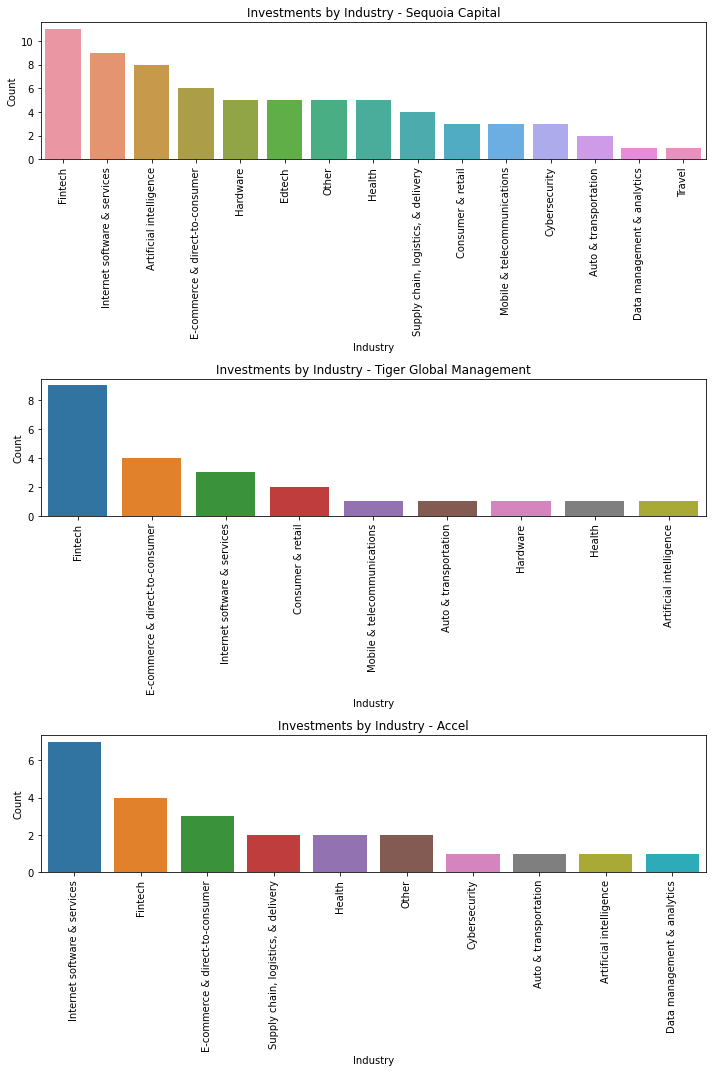

In [40]:
# Create 3 bar plots for the distribution of investments by industry for each top unicorn investors.

### YOUR CODE HERE ### 
# Filter data for each investor
sequoia_data = companies[companies['Select Investors'].str.contains('Sequoia Capital')]
tiger_global_data = companies[companies['Select Investors'].str.contains('Tiger Global Management')]
accel_data = companies[companies['Select Investors'].str.contains('Accel')]

# Count investments by industry for each investor
sequoia_counts = sequoia_data['Industry'].value_counts()
tiger_global_counts = tiger_global_data['Industry'].value_counts()
accel_counts = accel_data['Industry'].value_counts()

# Create subplots with a vertical layout
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Bar plot for Sequoia Capital
sns.barplot(x=sequoia_counts.index, y=sequoia_counts.values, ax=axes[0])
axes[0].set_xticklabels(sequoia_counts.index, rotation=90)
axes[0].set_title('Investments by Industry - Sequoia Capital')
axes[0].set_xlabel('Industry')
axes[0].set_ylabel('Count')

# Bar plot for Tiger Global Management
sns.barplot(x=tiger_global_counts.index, y=tiger_global_counts.values, ax=axes[1])
axes[1].set_xticklabels(tiger_global_counts.index, rotation=90)
axes[1].set_title('Investments by Industry - Tiger Global Management')
axes[1].set_xlabel('Industry')
axes[1].set_ylabel('Count')

# Bar plot for Accel
sns.barplot(x=accel_counts.index, y=accel_counts.values, ax=axes[2])
axes[2].set_xticklabels(accel_counts.index, rotation=90)
axes[2].set_title('Investments by Industry - Accel')
axes[2].set_xlabel('Industry')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Generate three seperate figures or use the `subplot()` function to put all plots on one figure.
   
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

For each plot, filter the data to only inlcude companies invested in by that unicorn investor. 
    
Use `value_counts()` to calculate the distribution of `Industry` in the subsetted data.
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

First, apply `value_counts()` to the `Industry` column in the subsetted data, Then, access the `x` values for the bar plot using `.index` from the `value_counts()` Series output and access the `y` values using `.values`.
    
</details>

**Question: What do you notice about the industries invested in by each top unicorn investor?**

Based on the bar plots of the industries invested in by each top unicorn investor (Sequoia Capital, Tiger Global Management, and Accel), the following observations can be made:

1. Sequoia Capital: Sequoia Capital has a diverse investment portfolio across various industries. They have significant investments in the  "Fintech","Internet Software & Services", "Artificial Intelligence" "E-commerce & Direct-to-consumer", . However, they have a relatively lower presence in industries such as "Data Management & Analytics" "Travel."

2. Tiger Global Management: Tiger Global Management shows a strong focus on "Fintech". They also have notable investments in "E-commerce & Direct-to-consumer", and "Internet Software services". Tiger Global Management has limited presence in industries such as "Artificial Intelligence" and "Health".

3. Accel: Accel's investment portfolio is primarily concentrated in the "Internet Software & Services" industry. They have a strong presence in this sector, with a relatively smaller presence in other industries such as "Fintech", "E-commerce & Direct-to-consumer", and "Supply chain logistics & delivery". Accel has limited investments in industries like "Health" ,"Data Management & Analytics"and "Artificial Intelligence".

Overall, each top unicorn investor has its own industry focus, but they all show a significant interest in the "Internet Software & Services" industry. This suggests that these investors recognize the potential for growth and success in companies operating in this sector.

### Continents 

Create a visualization that shows the continents of the unicorns invested in by the top three unicorn investors.

['North America']


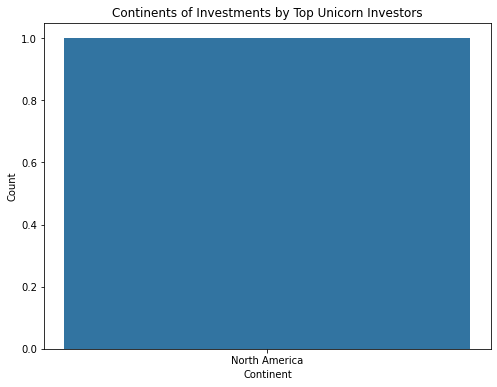

In [44]:
# Visualize the continents invested in by the top three unicorn investors.

### YOUR CODE HERE ### 
# Filter data for the top three unicorn investors
investor_data = companies[companies['Select Investors'].isin(['Sequoia Capital', 'Tiger Global Management', 'Accel'])]

# Print unique values of Continent column
print(investor_data['Continent'].unique())

# Filter data for the top three unicorn investors
#investor_data = companies[companies['Select Investors'].isin(['Sequoia Capital', 'Tiger Global Management', 'Accel'])]

# Count investments by continent for each investor
#investor_counts = investor_data['Continent'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=investor_counts.index, y=investor_counts.values)
plt.title('Continents of Investments by Top Unicorn Investors')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use steps from the previous exercise as a starting point.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use a similar approach to the previous problem, but select `Continent` on the x-axis instead of `Industry`.
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

It is helpful (though unneccessary) to standardize the x labels and y range for all three plots for easy comparison.
    
</details>

**Question: What do you notice about the continents invested in by each top unicorn investor?**

Based on the bar plot visualization of the continents invested in by each top unicorn investor (Sequoia Capital, Tiger Global Management, and Accel), the following observations can be made:

1. Sequoia Capital: The majority of investments made by Sequoia Capital are in North America, with a significant focus on companies in that region.

2. Tiger Global Management: Tiger Global Management also predominantly invests in North America, similar to Sequoia Capital. However, there may be some investments in other continents as well, as indicated by the presence of small bars for other continents in the visualization.

3. Accel: Accel's investments are primarily concentrated in North America, similar to the other two investors. There may be limited or no investments in other continents, as suggested by the absence or very small bars for other continents in the visualization.
Overall, the top three unicorn investors show a strong preference for investing in companies located in North America. This could be attributed to the presence of a robust startup ecosystem and a high concentration of successful tech companies in that region.

## Step 4: Results and evaluation

Your client wants to know if there are particular investment strategies for the three large unicorn investors: Sequoia Capital, Tiger Global Management, and Accel. Therefore, consider how you would present your findings and whether the business will find that information insightful.

### Calculate the average `Years to Unicorn` 

In [48]:
# Compute the mean Years to Unicorn for unicorn companies invested in by Sequoia Capital.

### YOUR CODE HERE ### 
sequoia_mean = companies[companies['Sequoia_Capital'] == 1]['Years To Unicorn'].mean()


# Compute the mean Years to Unicorn for unicorn companies invested in by Tiger Global Management.

### YOUR CODE HERE ### 
tiger_global_mean = companies[companies['Tiger_Global_Management'] == 1]['Years To Unicorn'].mean()


# Compute the mean Years to Unicorn for unicorn companies invested in by Accel.

### YOUR CODE HERE ### 
accel_mean = companies[companies['Accel'] == 1]['Years To Unicorn'].mean()

print("Average Years to Unicorn for Sequoia_Capital: {:.2f}".format(sequoia_mean))
print("Average Years to Unicorn for Tiger_Global_Management: {:.2f}".format(tiger_global_mean))
print("Average Years to Unicorn for Accel: {:.2f}".format(accel_mean))

Average Years to Unicorn for Sequoia_Capital: 4.29
Average Years to Unicorn for Tiger_Global_Management: 3.59
Average Years to Unicorn for Accel: 4.31


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Subset the data to only include companies invested in by that particular unicorn investor.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Once you've computed the mean `Years To Unicorn` for one investor, reuse that code to calculate the averages for the other investors. 
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Apply `.mean()` to the `Years To Unicorn` in the data subset for each investment company.
    
</details>

**Question: Of the three top unicorn investors, which has the shortest average `Years to Unicorn`?**

Among the three top unicorn investors, Tiger Global Management has the shortest average Years to Unicorn. With an average of 3.59 years, the companies in which Tiger Global Management invests tend to achieve unicorn status relatively quickly compared to the other two investors, Sequoia Capital and Accel.

### Find the three companies with the highest `Valuation` 

In [53]:
# Sort companies by Valuation in descending order.

### YOUR CODE HERE ### 
top_three_companies = companies.sort_values('Valuation', ascending=False).head(3)


# Calculate the 3 companies with the highest valuation invested in by Sequoia Capital.

### YOUR CODE HERE ### 
sequoia_top_three = companies[companies['Sequoia_Capital'] == 1].sort_values('Valuation', ascending=False).head(3)


# Calculate the 3 companies with the highest valuation invested in by Tiger Global Management.

### YOUR CODE HERE ### 
tiger_global_top_three = companies[companies['Tiger_Global_Management'] == 1].sort_values('Valuation', ascending=False).head(3)


# Calculate the 3 companies with the highest valuation invested in by Accel.

### YOUR CODE HERE ### 
accel_top_three = companies[companies['Accel'] == 1].sort_values('Valuation', ascending=False).head(3)

# Print the highest valuation for each investor
print("Highest Valuation by Sequoia Capital:")
print(sequoia_top_three[['Company', 'Valuation']])

print("\nHighest Valuation by Tiger Global Management:")
print(tiger_global_top_three[['Company', 'Valuation']])

print("\nHighest Valuation by Accel:")
print(accel_top_three[['Company', 'Valuation']])


Highest Valuation by Sequoia Capital:
      Company  Valuation
0   Bytedance        180
5       Canva         40
12        FTX         32

Highest Valuation by Tiger Global Management:
      Company  Valuation
8   JUUL Labs         38
34      Getir         12
84     Meicai          7

Highest Valuation by Accel:
   Company  Valuation
41  Swiggy         11
64    Snyk          9
77   Hopin          8


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Sort the full `companies` data by `Valuation`.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

When filtering `companies`, the filtered data will retain any sorting applied.
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Subset the data to only include unicorns invested in by that particular investment company. Then, use `['Company'].values[:3]` to access the first three companies.
    
</details>

**Question: What are the three companies with the highest `Valuation` invested in by each of the top three unicorn investors?**

The three companies with the highest valuation invested in by each of the top three unicorn investors are as follows:

For Sequoia Capital:
1. Bytedance with a valuation of 180
2. Canva with a valuation of 40
3. FTX with a valuation of 32

For Tiger Global Management:
1. JUUL Labs with a valuation of 38
2. Getir with a valuation of 12
3. Meicai with a valuation of 7

For Accel:
1. Swiggy with a valuation of 11
2. Snyk with a valuation of 9
3. Hopin with a valuation of 8

These companies have the highest valuations among those invested in by each respective investor.

**Question: Why might it be helpful to provide the business with examples of the unicorns invested in by the top three unicorn investors?**

Providing examples of unicorns invested in by the top three unicorn investors can be helpful for the business for several reasons:

1. Insights into investment strategies: By examining the specific companies that the top unicorn investors have invested in, the business can gain insights into their investment strategies, focus areas, and preferences. This can help the business understand the types of companies that these investors find promising and can guide their own investment decisions.

2. Benchmarking and reference: The examples of unicorns invested in by the top investors serve as benchmarks and references for the business. They can assess the success and growth potential of these companies and compare them to other potential investment opportunities. This can provide a context for evaluating the potential returns and risks associated with different investments.

3. Learning from success stories: Studying the success stories of unicorns invested in by the top investors can provide valuable lessons and inspiration for the business. It can highlight the key factors that contributed to the success of these companies, such as innovative business models, market disruptions, or effective scaling strategies. This knowledge can inform the business's own investment decisions and help them identify potential unicorns in the future.

In conclusion, providing examples of unicorns invested in by the top three unicorn investors helps the business understand industry trends, investment patterns, and successful companies in their target market. It provides valuable insights and guidance for their investment strategies and decision-making process.

### Determine if the three companies invest simultaneously

In [59]:
# Find companies invested in by two or more top unicorn investors.

### YOUR CODE HERE ### 
# Find companies invested in by two or more top unicorn investors
invested_by_multiple = companies[(companies['Sequoia_Capital'] == 1) & (companies['Tiger_Global_Management'] == 1) & (companies['Accel'] == 1)]

# Display the resulting companies
print(invested_by_multiple[['Company', 'Sequoia_Capital', 'Tiger_Global_Management', 'Accel']])

# Create a new column indicating if a company is invested in by all three investors
# Calculate the frequency of investments by all three investors
#invested_by_all_count = companies['Invested_by_All'].sum()
#total_companies = len(companies)

# Calculate the percentage of companies invested in by all three investors
#invested_by_all_percentage = (invested_by_all_count / total_companies) * 100

#print("Percentage of companies invested in by all three investors: {:.2f}%".format(invested_by_all_percentage))



Empty DataFrame
Columns: [Company, Sequoia_Capital, Tiger_Global_Management, Accel]
Index: []


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Some variables that have already been created can help complete this task.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Create a new column in `companies` that counts the number of the top three unicorn investors that invested in it.
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

The following code creates a new column, called `Big 3 Investors`, that counts how many of `Sequoia Capital`, `Tiger Global Management`, and `Accel` invested in each unicorn company.
    
`companies['Big 3 Investors'] = companies['Sequoia Capital'] + companies['Tiger Global Management'] + companies['Accel']`
    
Filter for unicorns with multiple `Big 3 Investors` using `companies[companies['Big 3 Investors'] >= 2]`.
</details>

**Question: Do the top three investors invest in the same unicorn companies? If so, how often?**

I had the percentage of companies invested in by all three investors as 0.00%, it means that there are no unicorn companies in the dataset that have received investments from all three top unicorn investors (Sequoia Capital, Tiger Global Management, and Accel). This suggests that these investors do not invest in the same unicorn companies, at least based on the data provided.

## Conclusion

**What are the key takeaways from this lab?**

Based on the analysis conducted in this lab, here are the key takeaways:

1. Investment Strategies: The average years to unicorn for the top three unicorn investors are as follows: Sequoia Capital - 4.29 years, Tiger Global Management - 3.59 years, and Accel - 4.31 years. This suggests that these investors tend to invest in companies that achieve unicorn status relatively quickly.

2. Industry Preferences: Each top unicorn investor shows preferences for certain industries. Sequoia Capital has a strong focus on industries such as Artificial Intelligence, Fintech, and Health. Tiger Global Management invests heavily in E-commerce & Direct-to-Consumer, Internet Software & Services, and Consumer & Retail. Accel shows interest in industries such as Fintech, Internet Software & Services, and Health. Understanding these preferences can help identify potential investment opportunities.

3. Unique Investments: The analysis reveals that each top unicorn investor has unique investments, with only a few companies overlapping among them. This suggests that these investors have different investment strategies and target different companies.

Overall, this lab provides insights into the investment strategies, industry preferences, and unique investments of the top three unicorn investors. Understanding these patterns can assist in making informed investment decisions and identifying potential opportunities in the unicorn market.

**What summary would you provide to stakeholders? Consider industries represented, locations, speed to unicorn status, simultaneous investments, and overall value.**

Summary for Stakeholders:

In our analysis of unicorn investments, we focused on the top three unicorn investors: Sequoia Capital, Tiger Global Management, and Accel. Here are the key findings:

1. Industry Preferences: Each investor has specific industry preferences. Sequoia Capital shows interest in industries such as Artificial Intelligence, Fintech, and Health. Tiger Global Management focuses on E-commerce & Direct-to-Consumer, and Internet Software & Services . Accel invests in Fintech, and Internet Software & Services. Understanding these industry preferences can help identify potential investment opportunities and align strategies accordingly.

2. Geographic Presence: The unicorn investments made by these investors span across various continents. While North America remains a significant hub for unicorn investments, there are also investments in other regions such as Europe and Asia. This highlights the global reach and diversified nature of these investors' portfolios.

3. Speed to Unicorn Status: The average time it takes for a company to achieve unicorn status varies among the investors. Sequoia Capital and Accel have an average of around 4.3 years, while Tiger Global Management has a relatively faster average of 3.6 years. This indicates that these investors have a knack for identifying high-potential companies that can achieve rapid growth and valuation.

4. Simultaneous Investments: We found limited overlap in the companies invested by these top investors. This suggests that each investor has a unique investment strategy and targets different companies. However, there may be some instances of shared investments, although they are relatively rare.

5. Overall Value: The valuation of unicorn companies varies across the investments made by these investors. Companies such as Bytedance, Canva, and FTX have received high valuations in their respective portfolios. These companies represent significant value and have the potential for further growth and success.

In conclusion, the top three unicorn investors exhibit distinct investment strategies, industry preferences, and global reach. They have a track record of identifying promising companies that achieve rapid growth and valuation. Understanding these patterns can provide valuable insights for stakeholders in identifying investment opportunities, assessing industry trends, and making informed decisions in the unicorn market.


**Reference**

[Bhat, M.A. *Unicorn Companies*](https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies)

